In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
plt.rcParams['font.family'] = 'AppleGothic'

국립수산과학원
https://www.nifs.go.kr

In [3]:
confFile = "/Users/unchil/AndroidStudioProjects/full-stack-task-manager/client/src/main/resources/application.json"
df_conf = pd.read_json(confFile)
conf = pd.DataFrame(df_conf.NIFS_API[0])

In [4]:
url_List = f"{conf.endPoint['list']}/{conf.subPath['list']}?key={conf.apikey['list']}&id={conf.id['list']}"
df_list = pd.read_json(url_List,  encoding='euc-kr')
df_list = pd.DataFrame(df_list.body["item"])
df_list.head(5)

,sta_nam_kor,wtr_tmp,obs_lay,repair_gbn,obs_tim,sta_cde,obs_dat
0,기장,23.8,1,1,12:00:00,bgj8a,2025-10-16
1,기장,23.8,2,1,12:00:00,bgj8a,2025-10-16
2,기장,23.7,3,1,12:00:00,bgj8a,2025-10-16
3,강릉,19.5,1,1,12:00:00,bgna3,2025-10-16
4,강릉,19.5,2,1,12:00:00,bgna3,2025-10-16


In [5]:
df_list.obs_lay = df_list.obs_lay.map( lambda x: '표층' if x == '1' else '중층' if x =='2' else '심층')

In [6]:
df_list = df_list.sort_values( by ='sta_nam_kor')
df_list.head(5)

,sta_nam_kor,wtr_tmp,obs_lay,repair_gbn,obs_tim,sta_cde,obs_dat
3,강릉,19.5,표층,1,12:00:00,bgna3,2025-10-16
4,강릉,19.5,중층,1,12:00:00,bgna3,2025-10-16
5,강릉,10.6,심층,1,12:00:00,bgna3,2025-10-16
24,거제 가배,22.3,표층,1,12:00:00,fgg4c,2025-10-16
61,거제 일운,23.8,표층,1,12:00:00,gi086,2025-10-16


In [7]:
#chart_data = df_list[df_list.obs_lay== '1'].filter(items=['sta_nam_kor', 'wtr_tmp', 'obs_lay', 'sta_cde'])
chart_data = df_list.filter(items=['sta_nam_kor', 'wtr_tmp', 'obs_lay', 'sta_cde'])
chart_data.head(5)

,sta_nam_kor,wtr_tmp,obs_lay,sta_cde
3,강릉,19.5,표층,bgna3
4,강릉,19.5,중층,bgna3
5,강릉,10.6,심층,bgna3
24,거제 가배,22.3,표층,fgg4c
61,거제 일운,23.8,표층,gi086


In [8]:
chart_data.dtypes

sta_nam_kor    object
wtr_tmp        object
obs_lay        object
sta_cde        object
dtype: object

In [9]:
chart_data.wtr_tmp = chart_data.wtr_tmp.astype(float)

In [10]:
chart_data.dtypes

sta_nam_kor     object
wtr_tmp        float64
obs_lay         object
sta_cde         object
dtype: object

In [ ]:
fig = px.bar( 
    chart_data,  
    x='sta_nam_kor', 
    y='wtr_tmp', 
    color='obs_lay', 
    barmode='group', 
    range_y=(5,30), 
    title='Ocean Water Temperature', 
    labels={'wtr_tmp':'Temperature °C', 'sta_nam_kor': 'Observation Point', 'obs_lay':'Observed Layer'}
)
fig.update_layout(width=1200, height=400)
fig.show()

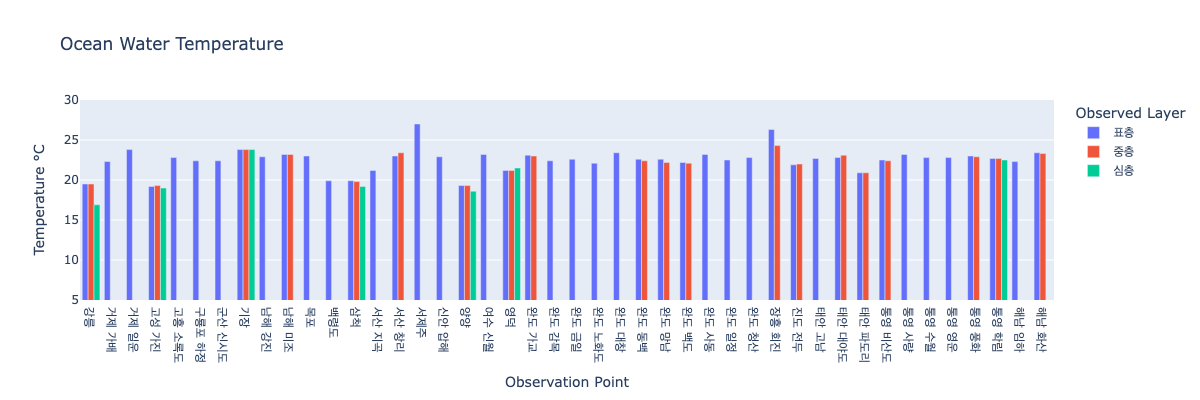

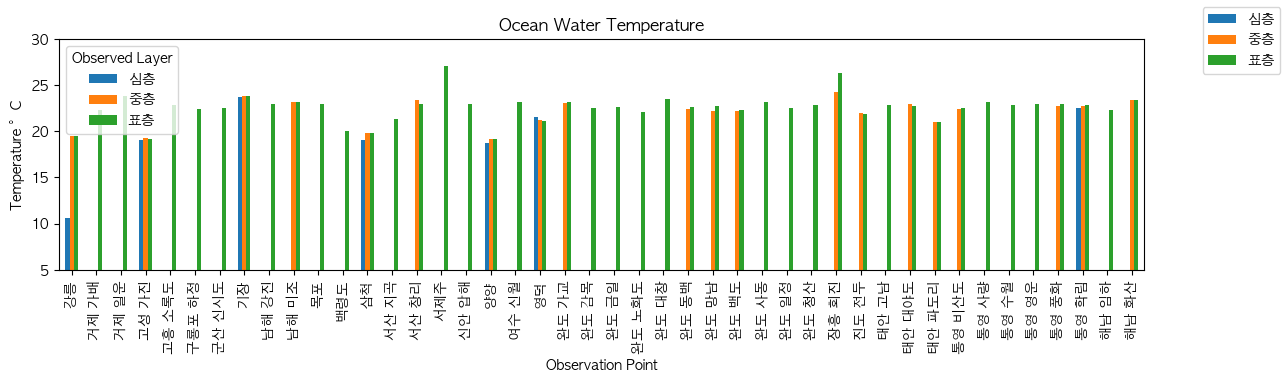

In [12]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(1, 1, figsize=(14, 3))
ax.set_title('Ocean Water Temperature')
ax.set_ylabel('Temperature °C')


chart_data['wtr_tmp'] = pd.to_numeric(chart_data['wtr_tmp'])
chart_data.rename(columns={'obs_lay':'Observed Layer' }).pivot(index='sta_nam_kor', columns='Observed Layer', values='wtr_tmp').plot.bar(
    ax=ax,  
    xlabel='Observation Point', 
    ylim=(5, 30), 

)
fig.legend()

In [13]:
url_Code = conf.endPoint['code'] + "/" + conf.subPath['code'] + "?key=" + conf.apikey['code'] + "&id=" + conf.id['code']
df_code = pd.read_json(url_Code,  encoding='euc-kr')
df_code = pd.DataFrame(df_code.body["item"]).sort_values(by='sta_nam_kor', ascending=True )
df_code.head(5)

,bld_dat,lon,sta_nam_kor,bot_dep,gru_nam,sur_dep,mid_tmp_yn,sta_cde,sta_des,end_dat,sur_tmp_yn,bot_tmp_yn,lat,mid_dep
46,2008-07-08,128.9492,강릉,30,동해,5,Y,bgna3,강원도 강릉시 사천면 사천항,None,Y,Y,37.799,20
78,2004-07-22,128.4589,거제,None,남해,5,N,ms002,경남 거제시 장승포동 양지암취,2005-07-04,N,N,34.5359,None
68,2004-12-24,128.5664,거제 가배,None,남해,5,N,fgg4c,경남 거제시 동부면 가배리 해바라기수산,None,Y,N,34.7851,None
6,2019-07-02,128.5142,거제 가조,10,남해,1,Y,fggj7,빈산소수괴 관측시스템,2019-12-12,Y,Y,34.9772,6
49,2008-06-20,128.7094,거제 일운,None,남해,5,N,gi086,거제 일운,None,Y,N,34.8038,None


In [14]:
df_map = pd.merge(df_list[df_list.obs_lay == '표층'], df_code, on='sta_cde')[['obs_dat', 'obs_tim', 'sta_nam_kor_x', 'wtr_tmp', 'lon', 'lat', 'sta_des']]
df_map.head(5)

,obs_dat,obs_tim,sta_nam_kor_x,wtr_tmp,lon,lat,sta_des
0,2025-10-16,12:00:00,강릉,19.5,128.9492,37.799,강원도 강릉시 사천면 사천항
1,2025-10-16,12:00:00,거제 가배,22.3,128.5664,34.7851,경남 거제시 동부면 가배리 해바라기수산
2,2025-10-16,12:00:00,거제 일운,23.8,128.7094,34.8038,거제 일운
3,2025-10-16,12:00:00,고성 가진,19.2,128.5239,38.3681,None
4,2025-10-16,12:00:00,고흥 소록도,22.8,127.1228,34.5049,None


In [15]:
df_map.wtr_tmp = df_map.wtr_tmp.astype(float)
df_map.lon = df_map.lon.astype(float)
df_map.lat = df_map.lat.astype(float)
df_map.dtypes

obs_dat           object
obs_tim           object
sta_nam_kor_x     object
wtr_tmp          float64
lon              float64
lat              float64
sta_des           object
dtype: object

In [ ]:
fig = px.scatter_map(df_map.rename(columns={'sta_nam_kor_x':'관측소', 'wtr_tmp':'Temperature' }), 
                        lat='lat', 
                        lon='lon', 
                        custom_data = ['관측소', 'obs_dat', 'obs_tim', 'Temperature'],
                        size='Temperature',
                        color='Temperature', 
                        color_continuous_scale=px.colors.sequential.Plasma,
                        map_style = 'open-street-map',
                        zoom=6, 
                        height=900)

# 툴팁 템플릿 정의 및 적용
custom_hovertemplate = (
    "<b>관측소: %{customdata[0]}</b><br>" + 
    "온도: %{customdata[3]:.1f}°C<br>" +
    "관측일시: %{customdata[1]} %{customdata[2]}<br>" 
)

fig.update_traces(
    hovertemplate=custom_hovertemplate
)

fig.update_layout(
     title=dict(text='Ocean Water Temperature')
) 
fig.show()

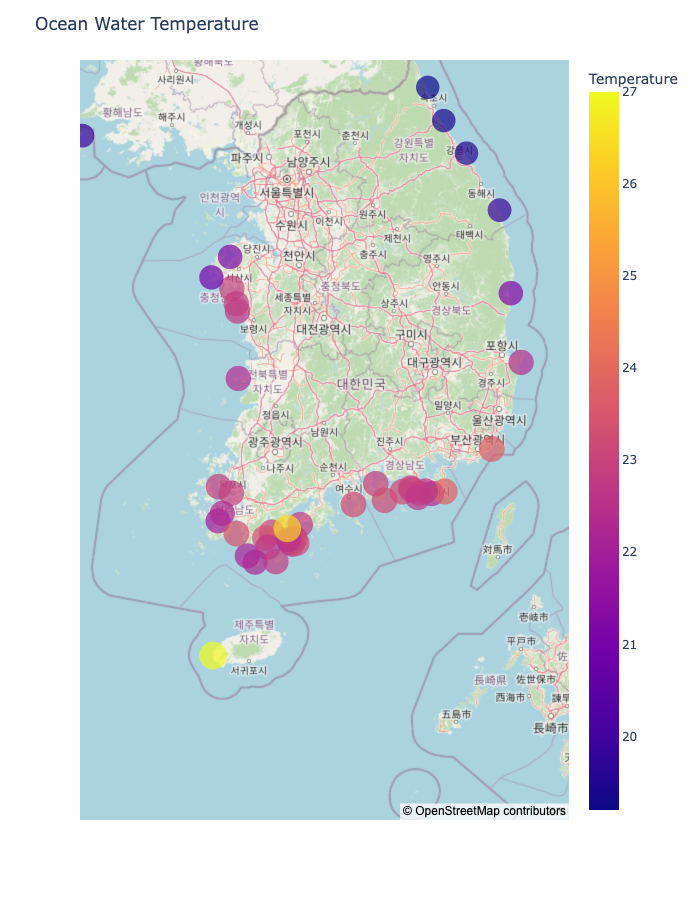

In [17]:
url_oneday = 'http://localhost:7788/nifs/seawaterinfo/oneday'
df_oneday = pd.read_json(url_oneday)
df_oneday.obs_datetime = pd.to_datetime(df_oneday.obs_datetime)
df_oneday.head(5)

,sta_cde,sta_nam_kor,obs_datetime,obs_lay,wtr_tmp,gru_nam,lon,lat
0,bgj8a,기장,2025-10-15 12:30:00,1,23.6,동해,129.2270,35.187
1,bgj8a,기장,2025-10-15 12:30:00,2,23.6,동해,129.2270,35.187
2,bgj8a,기장,2025-10-15 12:30:00,3,23.6,동해,129.2270,35.187
3,bgna3,강릉,2025-10-15 12:30:00,1,19.4,동해,128.9492,37.799
4,bgna3,강릉,2025-10-15 12:30:00,2,19.5,동해,128.9492,37.799


In [18]:
df_oneday.dtypes

sta_cde                 object
sta_nam_kor             object
obs_datetime    datetime64[ns]
obs_lay                  int64
wtr_tmp                float64
gru_nam                 object
lon                    float64
lat                    float64
dtype: object

In [ ]:
fig = px.line( 
    df_oneday[(df_oneday.gru_nam == '동해') & (df_oneday.obs_lay == 1 )],  
    x='obs_datetime', 
    y='wtr_tmp', 
    color='sta_nam_kor', 
    title='Ocean Water Temperature', 
    labels={'wtr_tmp':'Temperature °C', 'sta_nam_kor': 'Observation Point', 'obs_datetime':'Observation Time'}
)
fig.update_layout(width=1200, height=400)
fig.show()

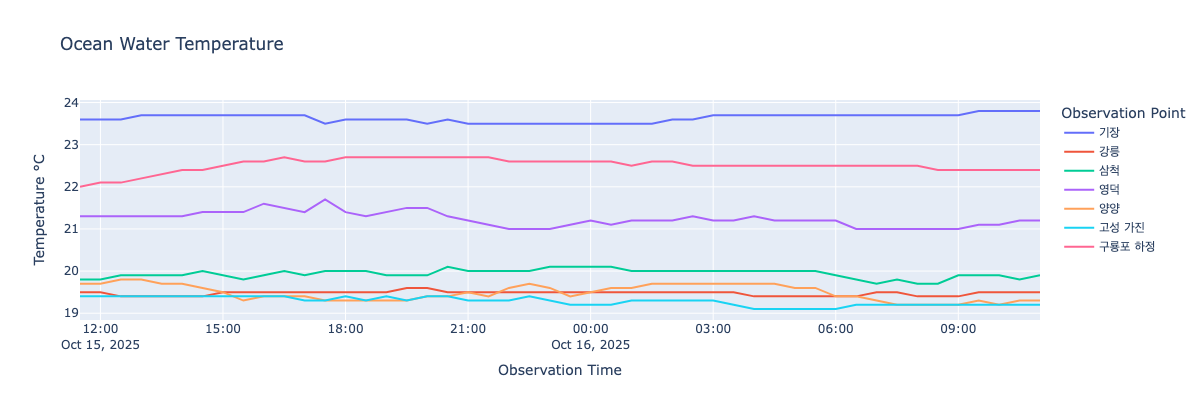

In [20]:
aa = df_oneday[ (df_oneday.obs_lay == 1 )]
aa.describe()

,obs_datetime,obs_lay,wtr_tmp,lon,lat
count,1939,1939.0,1939.000000,1939.000000,1939.000000
mean,2025-10-16 00:12:58.855079936,1.0,22.372769,127.464225,35.327795
min,2025-10-15 12:30:00,1.0,19.100000,124.729500,33.310400
25%,2025-10-15 18:00:00,1.0,22.200000,126.442200,34.382500
50%,2025-10-16 00:00:00,1.0,22.600000,127.065400,34.790400
75%,2025-10-16 06:15:00,1.0,23.000000,128.429300,36.415800
max,2025-10-16 12:00:00,1.0,27.400000,129.549700,38.368100
std,NaN,0.0,1.371692,1.137676,1.266816


<Axes: xlabel='sta_nam_kor', ylabel='wtr_tmp'>

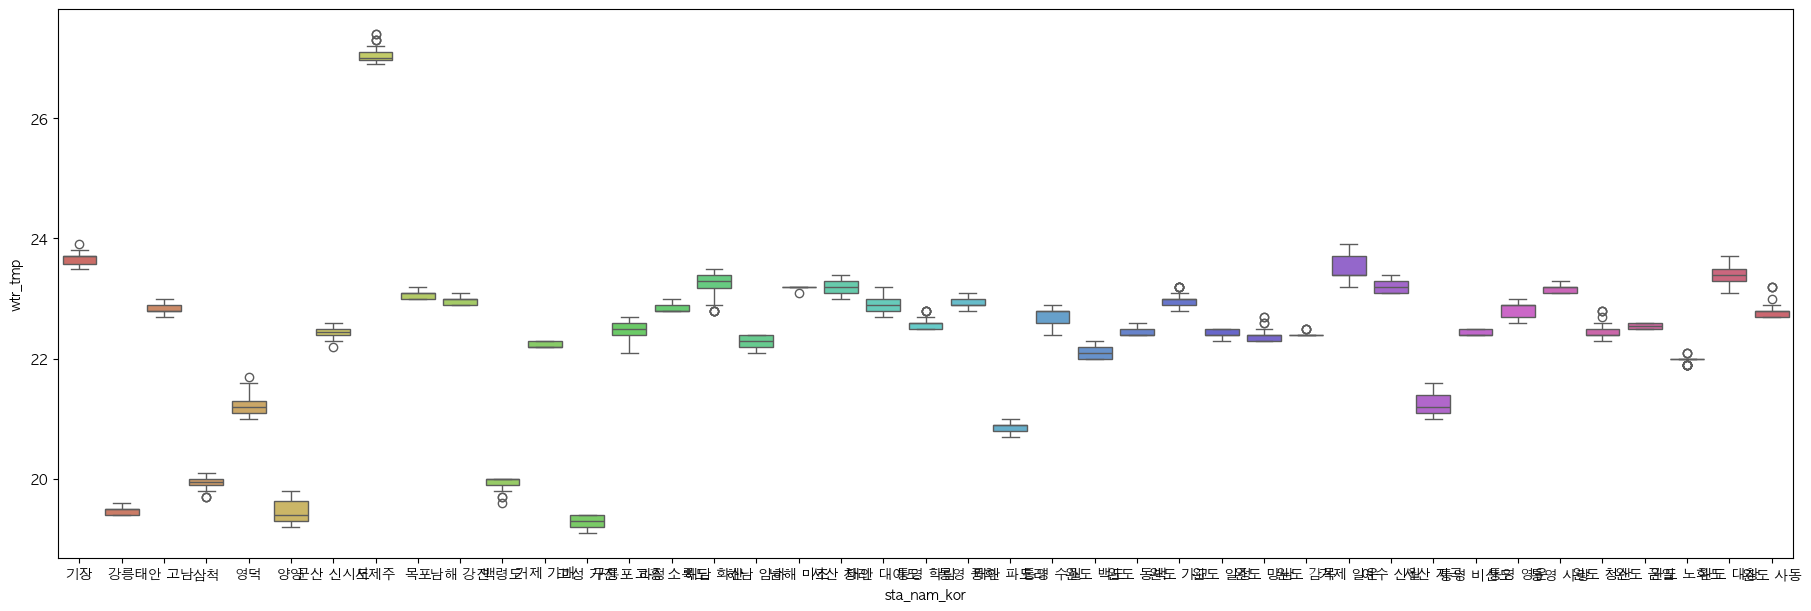

In [21]:
fig = plt.figure( figsize=(18,6), layout='constrained')
ax1 = fig.subplots(1)
sns.boxplot(x='sta_nam_kor', y='wtr_tmp', data = aa[[ 'sta_nam_kor', 'wtr_tmp']], hue= 'sta_nam_kor', ax=ax1, palette=sns.color_palette('hls', aa.sta_nam_kor.unique().size))

In [ ]:
fig = go.Figure()

for observatory in aa.sta_nam_kor.unique():
    fig.add_trace(go.Box( y = aa.loc[aa.sta_nam_kor == observatory ]['wtr_tmp'] , name=observatory) )

fig.update_layout(
        title=dict(
            text='일별 해수 온도 통계'
        ),
        xaxis=dict(
            title=dict(
                text='Observatory'
            )
        ),
        yaxis=dict(
            title=dict(
                text='Temperature (°C)'
            )
        ),
    width=1200, height=400
)

fig.show()    

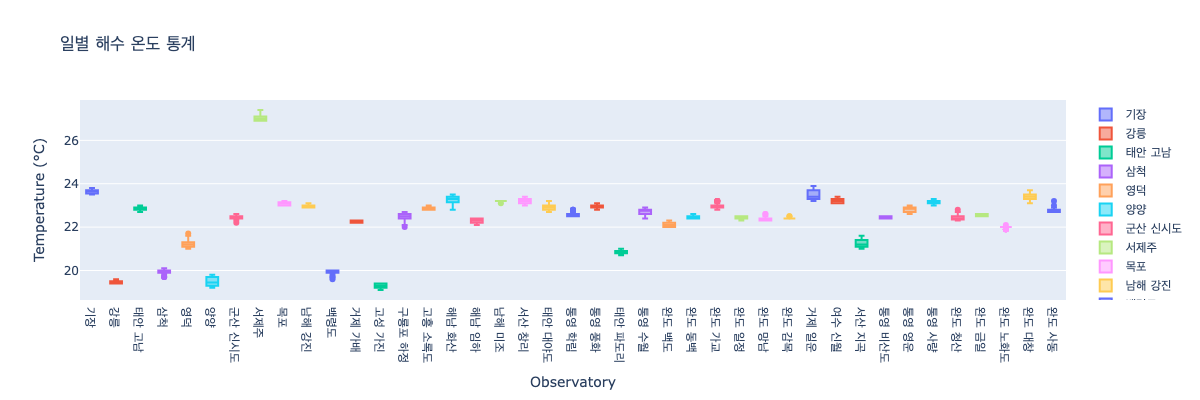

In [23]:
url_stat = 'http://localhost:7788/nifs/stat'
df_stat_raw = pd.read_json(url_stat)
df_stat_raw.head(5)

,gru_nam,sta_cde,sta_nam_kor,obs_datetime,tmp_min,tmp_max,tmp_avg
0,남해,fgg4c,거제 가배,25-10-15 12,22.2,22.3,22.25
1,남해,fgg4c,거제 가배,25-10-15 13,22.2,22.2,22.20
2,남해,fgg4c,거제 가배,25-10-15 14,22.2,22.2,22.20
3,남해,fgg4c,거제 가배,25-10-15 15,22.2,22.2,22.20
4,남해,fgg4c,거제 가배,25-10-15 16,22.2,22.2,22.20


In [24]:
data =  df_stat_raw.loc[df_stat_raw.gru_nam == '동해']
data.head(5)

,gru_nam,sta_cde,sta_nam_kor,obs_datetime,tmp_min,tmp_max,tmp_avg
590,동해,bgna3,강릉,25-10-15 12,19.4,19.5,19.45
591,동해,bgna3,강릉,25-10-15 13,19.4,19.4,19.40
592,동해,bgna3,강릉,25-10-15 14,19.4,19.4,19.40
593,동해,bgna3,강릉,25-10-15 15,19.5,19.5,19.50
594,동해,bgna3,강릉,25-10-15 16,19.5,19.5,19.50


In [ ]:
import plotly.express.colors as pcolors

fig = go.Figure()
colors = color = pcolors.qualitative.Dark24[:]

for index, name in enumerate(np.sort(data.sta_nam_kor.unique())[::-1]):
    observation =  data.loc[data.sta_nam_kor == name]
        
    # 1. 하한선 (Ribbon의 시작점)
    fig.add_trace(go.Scatter(
        x=observation['obs_datetime'],
        y=observation['tmp_min'],
        # 선은 숨기고, 아래쪽 영역부터 채우기 시작
        mode='lines',
        line=dict(width=0),
        showlegend=False,
        name='Min Temperature'
    ))
    
    # 2. 상한선 (Ribbon의 끝점)
    fig.add_trace(go.Scatter(
        x=observation['obs_datetime'],
        y=observation['tmp_max'],
        mode='lines',
        line=dict(width=0),
        showlegend=False,
        fill='tonexty', # 이전 트레이스(Lower)까지 영역을 채움으로써 Ribbon 생성
        fillcolor='rgba(0, 100, 80, 0.3)', # 채울 색상과 투명도 설정
        name='Max Temperature'
    ))
    
    # 3. 중심선 (데이터의 실제 값)
    fig.add_trace(go.Scatter(
        x=observation['obs_datetime'],
        y=observation['tmp_avg'],
        mode='lines+markers',
        line=dict(color=colors[index], width=0.5),
        marker=dict(
            size=4,  # 픽셀 단위로 크기 지정 (기본값은 보통 6)
            symbol='circle' # 마커의 모양도 변경 가능
        ),
        name=name
    ))
    
    
# 차트 레이아웃 설정
fig.update_layout(
    width=1200, height=400,
    title='Ocean Water Temperature Ribbon Chart',
    xaxis_title='Observation Time',
    yaxis_title='Temperature °C',
    hovermode="x unified" # 툴팁 설정
)       

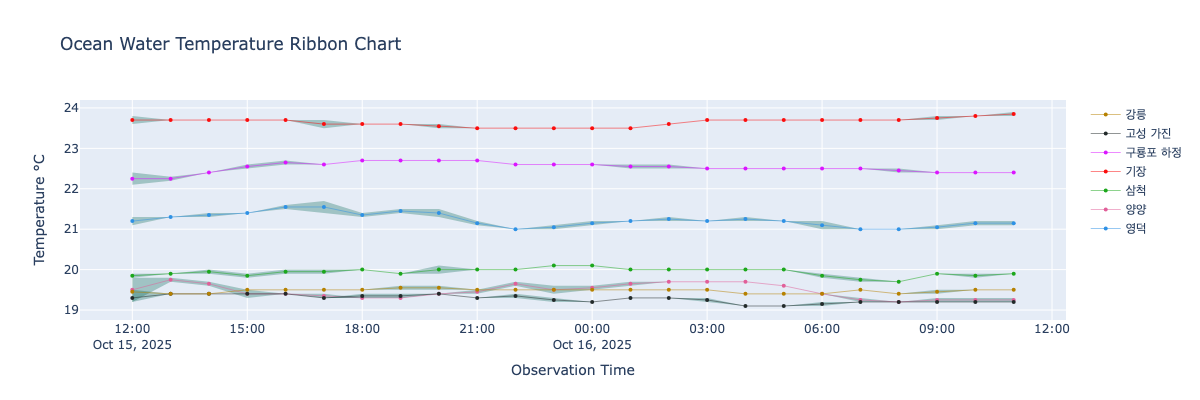